In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
foggy = "./dataset/foggy"
sunrise = "./dataset/sunrise"
shine = "./dataset/shine"
rainy = "./dataset/rainy"
cloudy = "./dataset/cloudy"

In [4]:
print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of Images in Each Directory:
Foggy: 360
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 340


In [5]:
x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [6]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|███████████████████████████████████████████████████████████████████████████████| 340/340 [00:01<00:00, 178.57it/s]


In [7]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((1598, 150, 150, 3), (1598,))

Let's see some of the Images

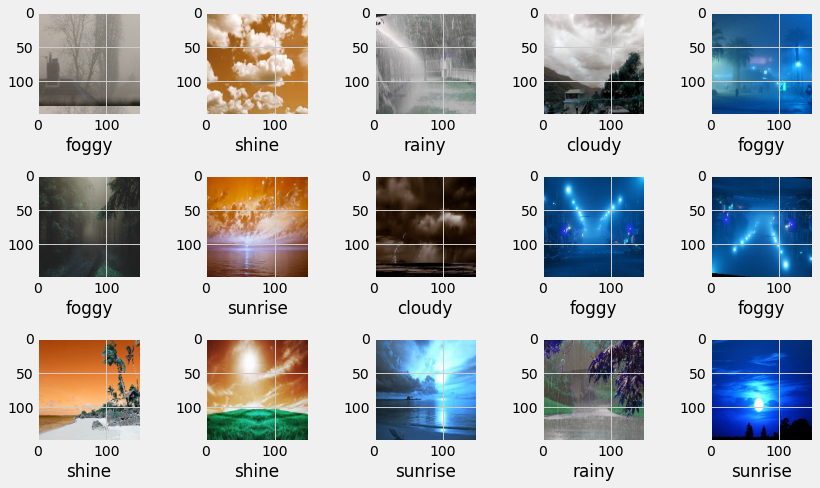

In [9]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)
    
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
img_size = 150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [13]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)


In [14]:
y_train_lb.shape,y_test_lb.shape

((1278, 5), (320, 5))

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(input_shape=(150, 150, 3), filters=64, kernel_size=(2, 2), activation="relu", padding="valid"))
model.add(Conv2D(64, kernel_size=(1, 1), activation="relu", padding="valid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(2, 2), activation="relu", padding="valid"))
model.add(Conv2D(128, kernel_size=(1, 1), activation="relu", padding="valid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, (2, 2), activation='relu', padding='valid'))
model.add(Conv2D(256, (1, 1), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(5, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 149, 149, 64)      832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 149, 149, 64)      4160      
_________________________________________________________________
batch_normalization (BatchNo (None, 149, 149, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 128)       32896     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 73, 73, 128)       16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 73, 73, 128)       5

In [17]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

In [19]:
batch_size=50
history =  model.fit(x_train,y_train_lb,epochs=50,validation_data=(x_test,y_test_lb),verbose=1,callbacks=earlystop)

Epoch 1/50
40/40 [==============================] - 134s 3s/step - loss: 14.1519 - accuracy: 0.4962 - val_loss: 16.7955 - val_accuracy: 0.2344
Epoch 2/50
40/40 [==============================] - 126s 3s/step - loss: 11.4032 - accuracy: 0.5894 - val_loss: 16.8017 - val_accuracy: 0.2344
Epoch 3/50
40/40 [==============================] - 127s 3s/step - loss: 6.7128 - accuracy: 0.5871 - val_loss: 3.9741 - val_accuracy: 0.2344
Epoch 4/50
40/40 [==============================] - 126s 3s/step - loss: 3.8644 - accuracy: 0.5776 - val_loss: 3.0170 - val_accuracy: 0.2344
Epoch 5/50
40/40 [==============================] - 139s 3s/step - loss: 2.8517 - accuracy: 0.6175 - val_loss: 1.8367 - val_accuracy: 0.2594
Epoch 6/50
40/40 [==============================] - 138s 3s/step - loss: 1.8209 - accuracy: 0.6253 - val_loss: 1.6334 - val_accuracy: 0.3219
Epoch 7/50
40/40 [==============================] - 157s 4s/step - loss: 2.2261 - accuracy: 0.5951 - val_loss: 1.5140 - val_accuracy: 0.3125
Epoch 8/5

In [20]:
loss,accuracy = model.evaluate(x_test,y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")  

y_pred = model.predict_classes(x_test)

10/10 [==============================] - 4s 438ms/step - loss: 0.5491 - accuracy: 0.8094
Loss: 0.5491305589675903
Accuracy: 0.809374988079071


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68        71
           1       0.65      0.93      0.77        75
           2       1.00      0.61      0.76        57
           3       0.78      0.91      0.84        43
           4       0.97      0.99      0.98        74

    accuracy                           0.81       320
   macro avg       0.84      0.81      0.81       320
weighted avg       0.84      0.81      0.81       320



Confusion Matrix

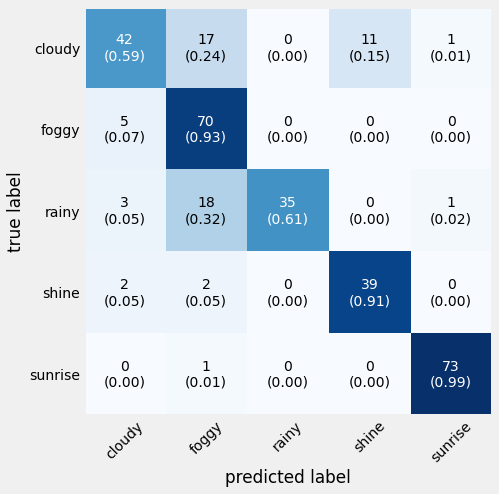

In [23]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["cloudy","foggy","rainy","shine","sunrise"],
                      show_normed = True);

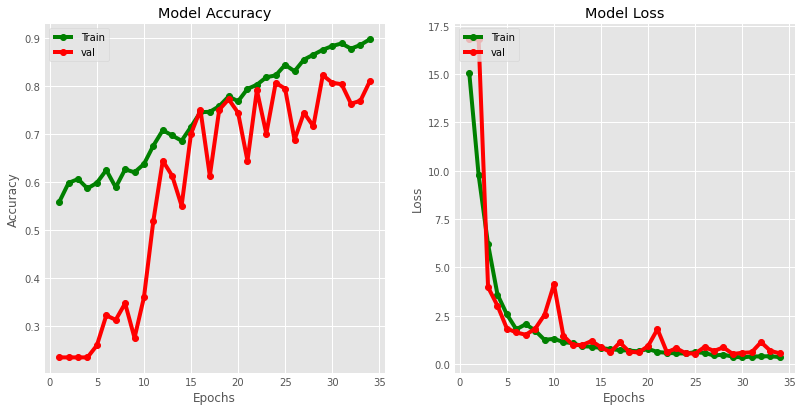

In [25]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,35)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

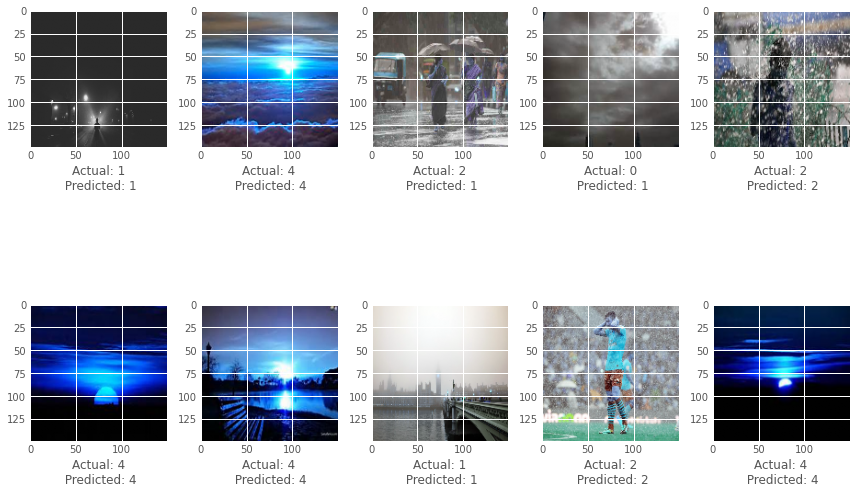

In [26]:
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(10):
    sample = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(x_test[sample])
    plt.xlabel(f"Actual: {y_test[sample]}\n Predicted: {y_pred[sample]}")
    
plt.tight_layout()    
plt.show()  

In [2]:
model.save("./model")

# from tensorflow.keras.models import load_model
# model = load_model('./model')

# Testing the model using 40 weather images (8 of each weather class)

In [3]:
test = "./dataset/test_dataset"
test_x = []
test_y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        test_x.append(img)
        test_y.append(i.split('_')[0])
    return test_x, test_y


test_x, test_y = create_dataset(test, "test")

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.54it/s]


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
actual_y = test_y
test_y = le.fit_transform(test_y)

img_size = 150
test_x = np.array(test_x)/255.0
test_y = np.array(test_y)

In [5]:
pred_y = np.argmax(model.predict(test_x), axis=-1)

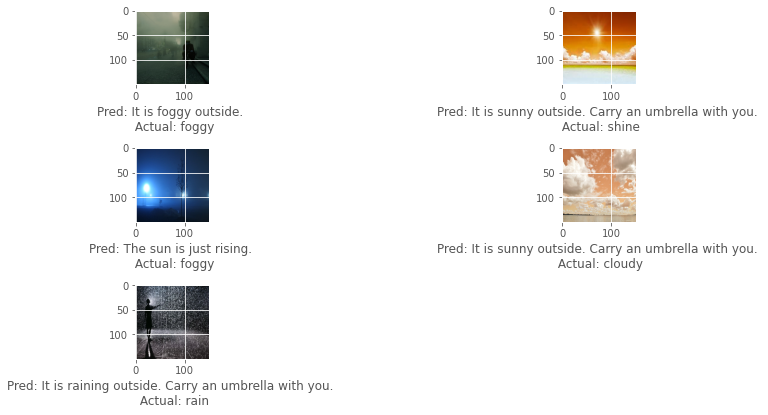

In [6]:
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(5):
    sample = random.choice(range(len(test_x)))
    plt.subplot(5, 2, i + 1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(test_x[sample])
    if pred_y[sample] == 0:
        label = 'It is cloudy outside, it might rain!. It is wise to carry an umbrella.'
    elif pred_y[sample] == 1:
        label = 'It is foggy outside.'
    elif pred_y[sample] == 2:
        label = 'It is raining outside. Carry an umbrella with you.'
    elif pred_y[sample] == 3: 
        label = 'It is sunny outside. Carry an umbrella with you.'
    elif pred_y[sample] == 4:
        label = 'The sun is just rising.'
    plt.xlabel(f"Pred: {label} \n Actual: {actual_y[sample]}")
    
plt.tight_layout()    
plt.show() 

In [7]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.75      0.75      0.75         8
           2       1.00      0.88      0.93         8
           3       0.88      0.88      0.88         8
           4       0.80      1.00      0.89         8

    accuracy                           0.85        40
   macro avg       0.86      0.85      0.85        40
weighted avg       0.86      0.85      0.85        40



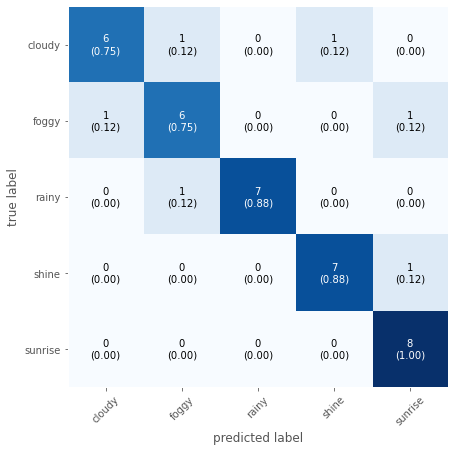

In [8]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(test_y,pred_y)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["cloudy","foggy","rainy","shine","sunrise"],
                      show_normed = True);